# Calidad del agua en ríos argentinos

Se realiza un estudio sobre la calidad del agua en 4 ríos distintos del
país. En el estudio se miden las concentraciones de 4 sustancias presentes
en el agua, realizándose una medición por día durante los 365 días
de un año. Los datos recolectados (generados artifcialmente) se encuentran en en el archivo "calidad_de_agua_en_ríos.csv". Cada columna
representa una de las 4 variables medidas: x1, x2, x3 y x4.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.linalg import block_diag
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [2]:
datos = pd.read_csv("calidad_de_agua_en_ríos.csv")
datosNP = datos.to_numpy()
X = datosNP
print(datos)

          x1       x2       x3       x4
0    1.03234  0.97527  0.78982  0.01312
1    0.15086  0.96799  1.04773  1.03626
2    0.81706  0.07163  1.24704  1.00608
3    0.99223  0.91724  1.01624  0.15660
4    1.07179  1.17694  0.91429  0.11499
..       ...      ...      ...      ...
360  0.31389  0.88151  1.12100  0.86861
361  1.04141 -0.04307  1.06503  0.85525
362  1.01799  0.14788  0.96818  1.12555
363  1.05328  1.09179  1.07234 -0.18293
364 -0.14553  0.95004  1.25199  1.04784

[365 rows x 4 columns]


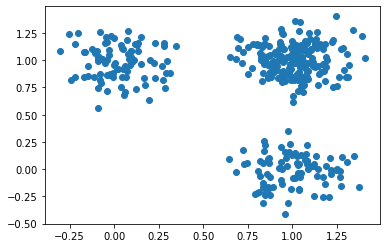

In [4]:
# Gráfico de dispersión de x1 y x2
x1 = X[:,0]
x2 = X[:,1]
x3 = X[:,2]
x4 = X[:,3]
plt.scatter(x1,x2)

In [6]:
# Se observan con claridad 3 posibles clusters

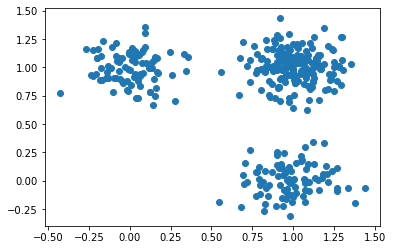

In [5]:
# Gráfico de dispersión de x3 y x4
plt.scatter(x3,x4)

In [9]:
# Se observan con claridad 3 posibles clusters

In [6]:
# Descompongo en componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=4) #la cantidad de componentes principales deben darse
Z = pca.fit_transform(X)
print(Z)

[[-0.42975683  0.6529681   0.23020144  0.10146379]
 [ 0.17550807 -0.53036936  0.52085558 -0.09672812]
 [ 0.8583197   0.1356038  -0.0930954  -0.06163926]
 ...
 [ 0.65740716  0.07664443 -0.39426787 -0.12226929]
 [-0.42588845  0.86500371  0.5042356  -0.00898874]
 [ 0.34697105 -0.65598729  0.80781264 -0.04671104]]


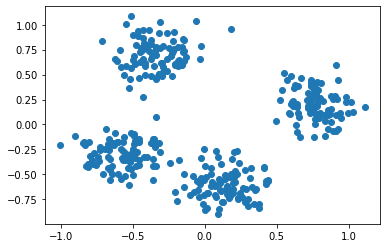

In [7]:
# Gráfico de dispersión de z1 y z2
z1 = Z[:,0]
z2 = Z[:,1]
z3 = Z[:,2]
z4 = Z[:,3]
plt.scatter(z1,z2)

In [14]:
# Se observan claramente 4 clusters posibles.

NameError: name 'x' is not defined

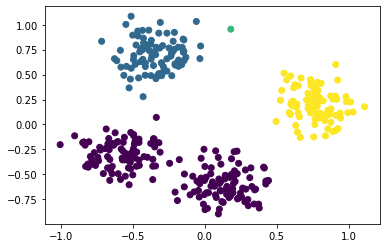

In [9]:
# Agrupo con JERÁRQUICO:
z1_z2 = np.c_[z1,z2]
cluster = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='single')
etiqueta = cluster.fit_predict(z1_z2)
plt.scatter(z1_z2[:,0],z1_z2[:,1],c=etiqueta)
indices = np.arange(len(z1_z2))
for label, z1_z2[:,0],z1_z2[:,1],in zip(indices, z1_z2[:,0], z1_z2[:,1]):
    plt.annotate(label, xy=(x,y))